In [8]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [9]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print("Root:", PATH_ROOT)
path_output = os.path.join(PATH_ROOT, "results_plot")
print("Output:", path_output)


Root: /home/lukec/workspace/diva_01
Output: /home/lukec/workspace/diva_01/results_plot


In [10]:
pivot_diff_baseline = pd.read_csv(
    os.path.join(path_output, "heatmap_diff_baseline.csv"), index_col="Poisoning Rate"
)
print(pivot_diff_baseline)


                 Easy  Normal   Hard
Poisoning Rate                      
Clean           100.0    98.0   38.0
0.05              0.0    32.0   96.0
0.1               0.0    60.0  100.0
0.15              4.0    68.0  100.0
0.2               8.0    76.0  100.0
0.25             14.0    76.0  100.0
0.3              18.0    78.0  100.0
0.35             18.0    64.0   96.0
0.4              20.0    58.0   88.0


In [11]:
pivot_diff_diva = pd.read_csv(
    os.path.join(path_output, "heatmap_diff_diva.csv"), index_col="Poisoning Rate"
)
print(pivot_diff_diva)


                 Easy  Normal  Hard
Poisoning Rate                     
Clean           100.0    98.0  72.0
0.05              0.0    10.0  48.0
0.1               0.0    34.0  68.0
0.15              2.0    48.0  78.0
0.2              18.0    62.0  80.0
0.25             24.0    66.0  82.0
0.3              40.0    72.0  86.0
0.35             42.0    70.0  86.0
0.4              48.0    72.0  88.0


In [12]:
pivot_noise_baseline = pd.read_csv(
    os.path.join(path_output, "heatmap_noise_baseline.csv"), index_col="Poisoning Rate"
)
print(pivot_noise_baseline)


                 0.0  0.05   0.1  0.15   0.2  0.25   0.3  0.35   0.4
Poisoning Rate                                                      
Clean           98.0  96.0  94.0  88.0  88.0  74.0  68.0  52.0  46.0
0.05            14.0  24.0  24.0  32.0  44.0  48.0  52.0  68.0  70.0
0.1             30.0  40.0  44.0  52.0  60.0  62.0  70.0  78.0  78.0
0.15            40.0  48.0  56.0  60.0  68.0  68.0  74.0  76.0  82.0
0.2             48.0  56.0  60.0  56.0  70.0  72.0  76.0  76.0  80.0
0.25            44.0  52.0  56.0  58.0  72.0  64.0  72.0  72.0  74.0
0.3             40.0  52.0  48.0  52.0  58.0  56.0  60.0  60.0  64.0
0.35            36.0  40.0  36.0  36.0  42.0  36.0  36.0  36.0  38.0
0.4             32.0  32.0  24.0  22.0  28.0  20.0  24.0  24.0  24.0


In [13]:
pivot_noise_diva = pd.read_csv(
    os.path.join(path_output, "heatmap_noise_diva.csv"), index_col="Poisoning Rate"
)
print(pivot_noise_diva)


                 0.0  0.05   0.1  0.15   0.2  0.25   0.3  0.35   0.4
Poisoning Rate                                                      
Clean           98.0  94.0  88.0  76.0  72.0  66.0  54.0  50.0  50.0
0.05            12.0  20.0  24.0  36.0  40.0  48.0  52.0  54.0  52.0
0.1             28.0  38.0  46.0  50.0  52.0  52.0  56.0  56.0  54.0
0.15            36.0  50.0  54.0  58.0  60.0  58.0  60.0  60.0  60.0
0.2             52.0  58.0  56.0  62.0  60.0  60.0  60.0  64.0  64.0
0.25            50.0  64.0  60.0  64.0  66.0  64.0  62.0  68.0  64.0
0.3             64.0  66.0  68.0  68.0  70.0  68.0  64.0  70.0  66.0
0.35            62.0  68.0  66.0  66.0  72.0  70.0  70.0  72.0  70.0
0.4             66.0  66.0  74.0  74.0  74.0  70.0  74.0  76.0  68.0


Save to: /home/lukec/workspace/diva_01/results_plot/synth_heatmap_4in1row.svg


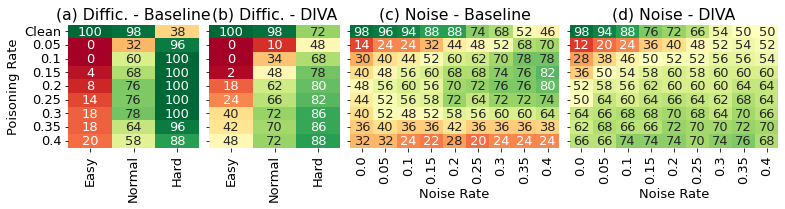

In [17]:
FONTSIZE = 13
FIGSIZE = (11, 3)
TITLES = [
    "(a) Diffic. - Baseline",
    "(b) Diffic. - DIVA",
    "(c) Noise - Baseline",
    "(d) Noise - DIVA",
]
CMAP = "RdYlGn"

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = FONTSIZE
fig, axes = plt.subplots(
    1, 4, sharey=True, figsize=FIGSIZE, gridspec_kw={"width_ratios": [1, 1, 1.6, 1.6]}
)

sns.heatmap(
    pivot_diff_baseline,
    ax=axes[0],
    annot=True,
    fmt=".0f",
    cmap=CMAP,
    vmin=0,
    vmax=100,
    cbar=False,
)
axes[0].set_ylabel("Poisoning Rate")

sns.heatmap(
    pivot_diff_diva,
    ax=axes[1],
    annot=True,
    fmt=".0f",
    cmap=CMAP,
    vmin=0,
    vmax=100,
    cbar=False,
)
sns.heatmap(
    pivot_noise_baseline,
    ax=axes[2],
    annot=True,
    fmt=".0f",
    cmap=CMAP,
    vmin=0,
    vmax=100,
    cbar=False,
)
sns.heatmap(
    pivot_noise_diva,
    ax=axes[3],
    annot=True,
    fmt=".0f",
    cmap=CMAP,
    vmin=0,
    vmax=100,
    cbar=False,
)

for i in range(1, 4):
    axes[i].set_ylabel("")

for i, ax in enumerate(axes):
    ax.set(xlabel=None)
    ax.set_title(TITLES[i])

axes[3].set_xticks(axes[2].get_xticks())
axes[3].set_xticklabels(axes[2].get_xticklabels())
# for tick in axes[3].get_xticklabels():
#     tick.set_rotation(90)

# for i in [0, 1]:
#     axes[i].set_xlabel("Difficulty")

for i in [2, 3]:
    axes[i].set_xlabel("Noise Rate")


plt.tight_layout(pad=0.8)
plot_heatmap = os.path.join(path_output, "synth_heatmap_4in1row.svg")
plt.savefig(plot_heatmap, dpi=300)
print(f"Save to: {plot_heatmap}")
